<a href="https://colab.research.google.com/github/justprophet/Memorability-of-videos/blob/master/code/MemorabilityWithInception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def read_HMP(fname):
    """Scan HMP(Histogram of Motion Patterns) features from file"""
    with open(fname) as f:
        for line in f:
            pairs=line.split()
            HMP_temp = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
    # there are 6075 bins, fill zeros
    HMP = np.zeros(6075)
    for idx in HMP_temp.keys():
        HMP[idx-1] = HMP_temp[idx]            
    return HMP

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Semester 2/Machine Learning/Assignment/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
!pip install pyprind

In [4]:
import pandas as pd
import numpy as np
import os
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from keras.callbacks import EarlyStopping

In [0]:
from string import punctuation
import pyprind
from collections import Counter
#from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

In [0]:
#df = pd.DataFrame(columns = ["VideoName", "ArrayInfo"])
#df.head()

#LOAD INCEPTION FEATURES

In [0]:
#Load Inception Features
df = pd.DataFrame(columns = ['video', 'arrayInfo'])

#dir_hmp = './dev-set/HMP'
dir_hmp = '/content/drive/My Drive/Semester 2/Machine Learning/Assignment/dev-set/InceptionV3'

for filename in os.listdir(dir_hmp):
    if filename.endswith(".txt"):
        path = os.path.join(dir_hmp, filename)
        array = read_HMP(path)
        if "-56" in filename:
          filename.replace('-56','')
          fileName= filename.replace(".txt",".webm")
          df = df.append({'video': fileName, 'arrayInfo': array}, ignore_index=True)
    else:
        break

In [0]:
count=0
for item in df['video']:
  df['video'][count]=item.replace('-56.webm','.webm')
  count = count + 1
  

In [0]:
# load labels and captions
def read_caps(fname):
    """Load the captions into a dataframe"""
    vn = []
    cap = []
    df = pd.DataFrame();
    with open(fname) as f:
        for line in f:
            pairs = line.split()
            vn.append(pairs[0])
            cap.append(pairs[1])
        df['video']=vn
        df['caption']=cap
    return df


# load the captions
cap_path = './dev-set_video-captions.txt'
df_captions=read_caps(cap_path)

# load the ground truth values
label_path = './'
labels=pd.read_csv(label_path+'dev-set_ground-truth.csv')

In [38]:
df_inception = df.merge(labels,on=["video"],how="inner")
df_inception.columns
df_inception.head()

,video,arrayInfo,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video7364.webm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.891,33,0.900,10
1,video737.webm,"[2.826083e-36, 0.0, 0.0, 0.0, 1.199688e-28, 0....",0.914,44,1.000,11
2,video7373.webm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.954,31,0.917,12
3,video7370.webm,"[2.318133e-24, 3.561454e-29, 2.048143e-24, 4.1...",0.951,33,0.938,16
4,video7372.webm,"[1.123148e-33, 0.0, 0.0, 0.0, 5.879868e-27, 0....",0.960,47,1.000,15


In [0]:
df_inception.to_csv('inception_features.csv')

In [0]:
from google.colab import files
files.download("inception_features.csv")

In [47]:
len(df_inception['arrayInfo'][255])

6075

#Convert into numpy array for using in deep learning model

In [45]:
result_array = np.empty((0, 6075))
result_array

array([], shape=(0, 6075), dtype=float64)

In [0]:
for line in df_inception['arrayInfo']:
    #result = do_stuff(line)
    #print(len(line))
    result_array = np.append(result_array, np.array([line]), axis = 0)

In [0]:
arrayInfo = df_inception['arrayInfo'].values

In [48]:
#X_arrHMP = df_hmp['arrayInfo']
X_arrHMP = result_array
#X_arrHMP = df_hmp.iloc[:,1:].values
#X_HMP = df_hmp['ArrayInfo']
#X_arrHMP = X_arrHMP.toarray()
print(type(X_arrHMP))
X_arrHMP

<class 'numpy.ndarray'>


array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.826083e-36, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [0]:
Y=df_inception[['short-term_memorability','long-term_memorability']].values  #targets
X=X_arrHMP #input

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42) # random state for reproducability

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

X_train (4800, 6075)
X_test (1200, 6075)
Y_train (4800, 2)
Y_test (1200, 2)


In [70]:
n_cols = X_train.shape[1]
n_cols

6075

In [0]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
# Add the second layer
model.add(Dense(100, activation='relu'))
# Add the output layer
model.add(Dense(2))

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
   
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

In [73]:
# Fit the model
#model.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))
# Fit the model
history=model.fit(X_train, Y_train, validation_split=0.3, epochs=30, callbacks= [early_stopping_monitor])


Train on 3360 samples, validate on 1440 samples
Epoch 1/30
3360/3360 [==============================] - 1s 204us/step - loss: 0.1124 - acc: 0.6917 - val_loss: 0.0142 - val_acc: 0.6986
Epoch 2/30
3360/3360 [==============================] - 0s 141us/step - loss: 0.0137 - acc: 0.7042 - val_loss: 0.0144 - val_acc: 0.6986
Epoch 3/30
3360/3360 [==============================] - 0s 146us/step - loss: 0.0135 - acc: 0.7045 - val_loss: 0.0138 - val_acc: 0.6965
Epoch 4/30
3360/3360 [==============================] - 0s 142us/step - loss: 0.0136 - acc: 0.7048 - val_loss: 0.0143 - val_acc: 0.6986
Epoch 5/30
3360/3360 [==============================] - 0s 142us/step - loss: 0.0136 - acc: 0.7048 - val_loss: 0.0144 - val_acc: 0.6986


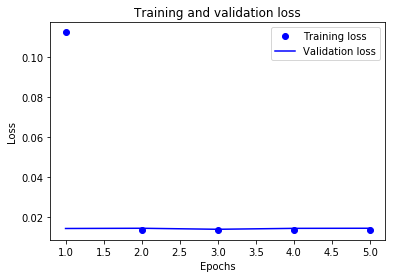

In [74]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

In [76]:
predictions = model.predict(X_test)
print(predictions)
Get_score(predictions, Y_test) 

[[0.8578392  0.7510468 ]
 [0.93219817 0.855384  ]
 [0.88225585 0.7771086 ]
 ...
 [0.8853072  0.8007056 ]
 [0.8694446  0.7677684 ]
 [0.90754145 0.80323166]]
The Spearman's correlation coefficient is: 0.080
The Spearman's correlation coefficient is: 0.026
